In [2]:
import pandas as pd

# Membaca file CSV
df = pd.read_csv('/content/sample_data/Filedata Data Daftar Sentra Industri Kecil Dan Menengah DKI Jakarta.csv')

# Fungsi untuk mengklasifikasikan nilai investasi
def classify_investment(value):
    try:
        value = float(value)
        if value <= 10_000_000:
            return 'Usaha Ultra Mikro'
        elif value <= 100_000_000:
            return 'Usaha Mikro'
        elif value <= 1_000_000_000:
            return 'Usaha Menengah'
        else:
            return 'Usaha Besar'
    except (ValueError, TypeError):
        return 'Tidak Diketahui'

# Menambahkan kolom baru dengan kategori investasi
df['Kategori_Investasi'] = df['nilai_investasi'].apply(classify_investment)

# Menyimpan file CSV yang telah dimodifikasi
df.to_csv('data_modifikasi.csv', index=False)

print("Atribut kategori telah ditambahkan dan disimpan sebagai 'data_modifikasi.csv'")


Atribut kategori telah ditambahkan dan disimpan sebagai 'data_modifikasi.csv'


Simple Kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


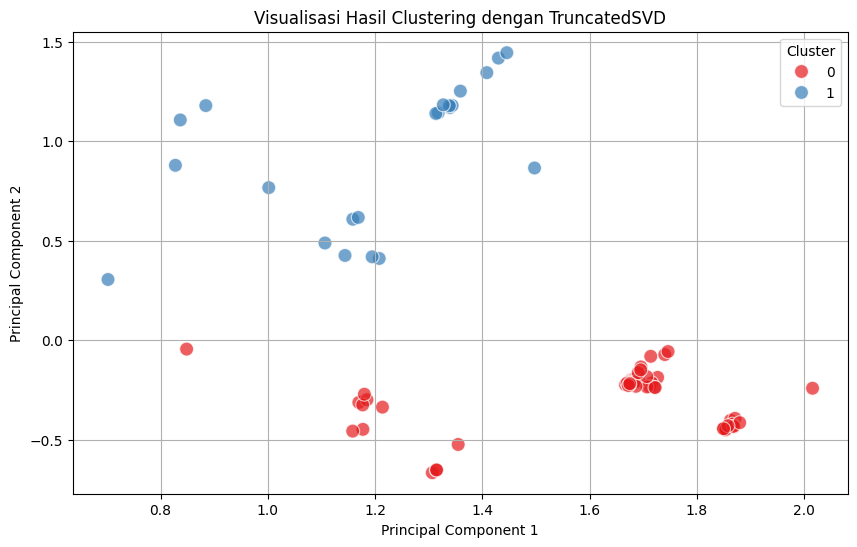

Rata-rata fitur untuk setiap cluster:
         jumlah_unit_usaha  tenaga_kerja  nilai_investasi  kapasitas_produksi  \
Cluster                                                                         
0                82.037736    195.849057     4.449057e+08        93652.173913   
1               130.590909    595.833333     1.986111e+09       171250.000000   

             latitude     longitude  
Cluster                              
0       -5.572799e+06  9.595767e+07  
1       -4.942098e+06  1.015019e+08  


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import numpy as np

# Muat data
data = pd.read_csv('/content/sample_data/data_modifikasi.csv')

# Pembersihan data (seperti sebelumnya)
def clean_coordinates(value):
    try:
        return float(value.replace(',', '.').replace(' ', ''))
    except (AttributeError, ValueError):
        return np.nan

data['latitude'] = data['latitude'].apply(clean_coordinates)
data['longitude'] = data['longitude'].apply(clean_coordinates)

# Identifikasi kolom kategorikal dan numerik
categorical_columns = ['nama_sentra', 'jenis_produk', 'Kategori_Investasi']
numerical_columns = ['jumlah_unit_usaha', 'tenaga_kerja', 'nilai_investasi', 'kapasitas_produksi', 'latitude', 'longitude']

# Pastikan kolom numerik hanya berisi data numerik
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Pilih kolom yang akan digunakan
data = data[categorical_columns + numerical_columns]

# Transformasi dan normalisasi data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', SimpleImputer(strategy='mean'), numerical_columns)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', MaxAbsScaler()),  # Gunakan MaxAbsScaler untuk data sparse
    ('kmeans', KMeans(n_clusters=2))
])

pipeline.fit(data)
data['Cluster'] = pipeline.named_steps['kmeans'].labels_

# Untuk TruncatedSVD, kita hanya perlu data numerik yang sudah diproses
processed_data = pipeline.named_steps['preprocessor'].transform(data)
scaled_data = pipeline.named_steps['scaler'].transform(processed_data)

# Terapkan TruncatedSVD untuk mengurangi dimensi
svd = TruncatedSVD(n_components=2)
principal_components = svd.fit_transform(scaled_data)
svd_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
svd_df['Cluster'] = data['Cluster']

# Plot hasil TruncatedSVD
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=svd_df, palette='Set1', s=100, alpha=0.7)
plt.title('Visualisasi Hasil Clustering dengan TruncatedSVD')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Penjelasan
cluster_summary = data[numerical_columns + ['Cluster']].groupby('Cluster').mean()
print("Rata-rata fitur untuk setiap cluster:")
print(cluster_summary)


Classes to cluster


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Akurasi Clustering dengan Classes to Clusters Evaluations: 0.49


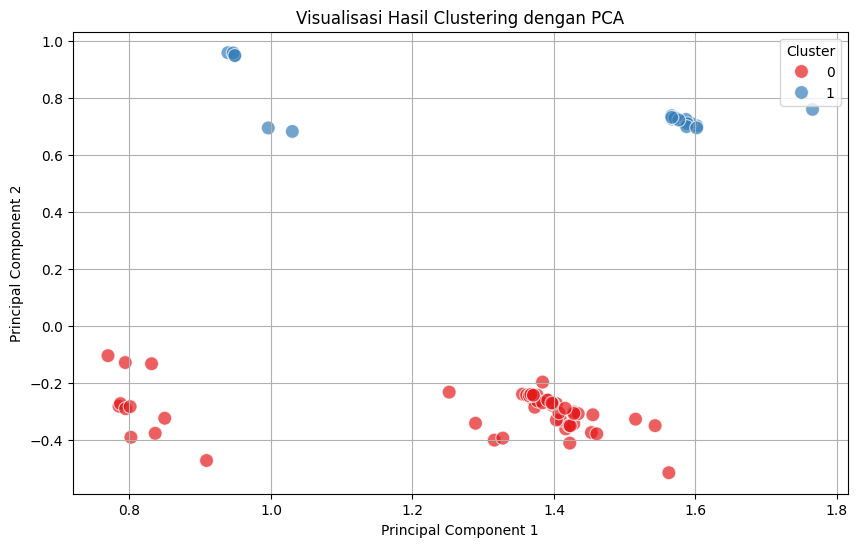

Rata-rata fitur untuk setiap cluster:
         jumlah_unit_usaha  tenaga_kerja  nilai_investasi  kapasitas_produksi  \
Cluster                                                                         
0                80.090909    287.176471     9.572549e+08       102533.333333   
1               140.800000    322.950000     5.255000e+08       124125.000000   

             latitude     longitude  
Cluster                              
0       -5.316503e+06  1.011881e+08  
1       -5.658724e+06  8.760983e+07  


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score

# Muat data
data = pd.read_csv('/content/sample_data/data_modifikasi.csv')

# Pembersihan data (seperti sebelumnya)
def clean_coordinates(value):
    try:
        return float(value.replace(',', '.').replace(' ', ''))
    except (AttributeError, ValueError):
        return np.nan

data['latitude'] = data['latitude'].apply(clean_coordinates)
data['longitude'] = data['longitude'].apply(clean_coordinates)

categorical_columns = ['nama_sentra', 'jenis_produk', 'Kategori_Investasi']
numerical_columns = ['jumlah_unit_usaha', 'tenaga_kerja', 'nilai_investasi', 'kapasitas_produksi', 'latitude', 'longitude']

for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data = data[categorical_columns + numerical_columns]

# Pisahkan label kelas (Kategori_Investasi) untuk evaluasi
X = data.drop(columns=['Kategori_Investasi'])
y = data['Kategori_Investasi']

# Transformasi dan normalisasi data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['nama_sentra', 'jenis_produk']),
        ('num', SimpleImputer(strategy='mean'), numerical_columns)
    ]
)

# Terapkan preprocessing pipeline pada data
X_preprocessed = preprocessor.fit_transform(X)

# Normalisasi data
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X_preprocessed)

# Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

X['Cluster'] = clusters

# Evaluasi hasil clustering dengan Classes to Clusters Evaluations
# Kita perlu mengonversi label kelas menjadi numerik untuk evaluasi
label_mapping = {label: idx for idx, label in enumerate(y.unique())}
y_numeric = y.map(label_mapping)

# Bandingkan hasil clustering dengan label kelas
accuracy = accuracy_score(y_numeric, X['Cluster'])
print(f"Akurasi Clustering dengan Classes to Clusters Evaluations: {accuracy:.2f}")

# Visualisasi hasil clustering dengan PCA
pca = TruncatedSVD(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = X['Cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1', s=100, alpha=0.7)
plt.title('Visualisasi Hasil Clustering dengan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Tampilkan rata-rata fitur untuk setiap cluster
# Hanya fitur numerik yang digunakan untuk rata-rata
numerical_data_with_cluster = X[numerical_columns + ['Cluster']]
cluster_summary = numerical_data_with_cluster.groupby('Cluster').mean()
print("Rata-rata fitur untuk setiap cluster:")
print(cluster_summary)


Decision tree

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Muat data
data = pd.read_csv('/content/sample_data/data_modifikasi.csv')

# Pembersihan data
def clean_coordinates(value):
    try:
        return float(value.replace(',', '.').replace(' ', ''))
    except (AttributeError, ValueError):
        return np.nan

data['latitude'] = data['latitude'].apply(clean_coordinates)
data['longitude'] = data['longitude'].apply(clean_coordinates)

categorical_columns = ['nama_sentra', 'jenis_produk', 'Kategori_Investasi']
numerical_columns = ['jumlah_unit_usaha', 'tenaga_kerja', 'nilai_investasi', 'kapasitas_produksi', 'latitude', 'longitude']

for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data = data[categorical_columns + numerical_columns]

# Pisahkan label kelas (Kategori_Investasi) untuk evaluasi
X = data.drop(columns=['Kategori_Investasi'])
y = data['Kategori_Investasi']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transformasi dan normalisasi data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['nama_sentra', 'jenis_produk']),
        ('num', SimpleImputer(strategy='mean'), numerical_columns)
    ],
    remainder='passthrough'
)

# Buat pipeline dengan model Decision Tree
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', MaxAbsScaler()),  # Gunakan MaxAbsScaler untuk data sparse
    ('classifier', DecisionTreeClassifier())
])

# Latih model
pipeline.fit(X_train, y_train)

# Evaluasi model
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model Decision Tree: {accuracy:.2f}")

# Buat prediksi untuk input baru
input_data = pd.DataFrame({
    'jumlah_unit_usaha': [200],
    'tenaga_kerja': [200],
    'nilai_investasi': [1_000_000_000],
    'kapasitas_produksi': [0],  # Masukkan nilai yang sesuai jika ada
    'latitude': [0],            # Masukkan nilai yang sesuai jika ada
    'longitude': [0],           # Masukkan nilai yang sesuai jika ada
    'nama_sentra': [''],        # Masukkan nilai yang sesuai jika ada
    'jenis_produk': ['']        # Masukkan nilai yang sesuai jika ada
})

# Prediksi kelas untuk input baru
predicted_class = pipeline.predict(input_data)
print(f"Kelas prediksi untuk input baru: {predicted_class[0]}")


Akurasi model Decision Tree: 1.00
Kelas prediksi untuk input baru: Usaha Menengah
